# Basic setup for fetching data from the facebook api

### Remember to add an active access token below and adjust the parameters and fields if necessary

In [ ]:
# must be specified to be able to use methods of package
import sys
sys.path.append('../src') 
import numpy as np
import pandas as pd
from political_ads.api_request import API_request
from political_ads.preprocessor import Preprocessor

# Generates a dataset (in the data directory)
# requestor = API_request()
# requestor.generate_dataset(500, "Joe Biden", "EAAD3So8oorMBAIgWyz9birkjFZCRkyKZADF6qfnmkZC41UPKMzeoSWPXLXxNTBiFP9td55s5TZCOKfAoheAmRih0U7TjaCCDsDQwZAZCBPH2pGQtx6y9e9Keouk8JosvkuLPxs451MY3QGrzZAgiZAVKFJZBxZCIFxHIKHVJmn8uwnGsJaMKh1mQIknChEeYf16tYyZCZBehAo4VToZCuqW0P5KL2")


In [ ]:
# Returns text file as dataframe with transformations
preprocess = Preprocessor()
# data = preprocess.file_to_df("..\\data\\generated_dataset.txt")

In [ ]:
data.head(10)

In [ ]:
'''
Visualization attempts
https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/09_timeseries.html
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting spending over time and impressions over time 
fig, axes = plt.subplots(2,1,figsize=(8,4))
data.plot(x="ad_creation_time", y="impressions", ax=axes[0])
data.plot(x="ad_creation_time", y="spend", ax=axes[1])

In [ ]:
# Plot range of impressions
plt.fill_between(x=data["ad_creation_time"], y1=data["impressions_lo"], y2=data["impressions_hi"], alpha=1, color="green")
plt.plot(data["ad_creation_time"], data["impressions"])
plt.show()

In [ ]:
'''
Amount spend by facebook page
'''
by_page = data.groupby("page_name").agg(
    # Aggregate no of ads
    no_ads = ('id', 'count'),
    # Aggregate sum of spend & total impressions generated
    spend_lo = ('spend_lo', 'sum'),
    spend_hi = ('spend_hi', 'sum'),
    impressions_lo = ('impressions_lo', 'sum'),
    impressions_hi = ('impressions_hi', 'sum'),
    # Average number of impressions & spend per ad
    avg_impressions = ('impressions', 'mean'),
    avg_spend = ('spend', 'mean')

).reset_index()

by_page

In [ ]:
# Display range of spend

# Maybe normalize it
plt.fill_between(x=by_page["page_name"], y1=by_page["spend_lo"], y2=by_page["spend_hi"], alpha=1, color="green")
plt.plot(by_page["page_name"], by_page["spend"])
plt.show()

In [ ]:
'''
Congress member filtering
'''
# Get page-ids:
# https://commentpicker.com/find-facebook-id.php


congress_members = pd.DataFrame(pd.read_csv("..\\src\\data_sets\\legislators-current.csv"))

In [ ]:
congress_members["facebook"]

In [ ]:
congress_members["facebook"].isnull().sum()

In [ ]:
# Scraper experiement
# https://github.com/kevinzg/facebook-scraper

from facebook_scraper import get_page_info

page = get_page_info(account="SenatorBobCasey")

page

In [ ]:
import time

members_fbNames_test = [] # list of tuples

for value in congress_members["facebook"].items():
    if not pd.isnull(value[1]):
        page = get_page_info(account=value[1])
        print(page)
        if "name" and "identifier" in page:
            members_fbNames_test.append((value[1], page["name"], page["identifier"]))
            print(page["name"] + " id:" + str(page["identifier"]))
    time.sleep(0.5)

In [ ]:
members_names = pd.DataFrame(members_fbNames_test, columns=["facebook", "page_name", "identifier"])
# Save data as csv
members_names.to_csv("..\\src\\data_sets\\legislators_page_ids.csv", index=False, header=True)

In [ ]:
members_names_cp = members_names.copy()

In [ ]:
congress_members_fb = congress_members[["first_name", "last_name", "full_name", "type", "state", "district", "party", "facebook"]]

merged = congress_members_fb.merge(right=members_names, on="facebook", how="left")

In [ ]:
merged["identifier"] = merged["identifier"].fillna(0).astype(np.int64)

In [ ]:
merged["identifier"] = merged["identifier"].astype(np.int64)

In [ ]:
merged.to_csv("..\\src\\data_sets\\legislators_fb_info.csv", index=False, header=True)

In [ ]:
congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info.csv")

In [61]:
report = pd.read_csv("..\\data\\FacebookAdLibraryReport_2021-10-15_US_lifelong_advertisers.csv")

C:\Users\laise\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
len(report)

385569

In [62]:
def get_page_id(data: pd.DataFrame, name: str):
    match = data[data["Page Name"].str.contains(name, na=False)]
    print(match)
    if len(match) != 0:
        return match.iloc[0][0]
    else:
        return "no match"

In [ ]:
import pandas as pd
congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info.csv")

In [ ]:
# must be specified to be able to use methods of package
import sys
sys.path.append('../src') 
import numpy as np
import pandas as pd
from political_ads.api_request import API_request
from political_ads.preprocessor import Preprocessor

preprocess = Preprocessor()

data = preprocess.file_to_df("..\\data\\dataset_by_pageId.txt")

data.shape

In [ ]:
congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info.csv")

congress

In [ ]:
# test
# trying to make continuous loop to fetch all data
import sys
sys.path.append('../src') 
import numpy as np
import pandas as pd
from political_ads.api_request import API_request
from political_ads.preprocessor import Preprocessor

requestor = API_request()

count = 0
while count < 20:
    query = []
    for i in range(10):
        if count < len(congress):
            query.append(congress.loc[count]["page_id"])
            count +=1
    # clean query / remove "no match"
    clean_query = []
    for i in range(len(query)):
        if query[i] != "no match":
            clean_query.append(query[i])
    print(clean_query)
    
    requestor.append_dataset_by_pageId(500, clean_query, "EAAD3So8oorMBAL9qzc2ZBrrDaNqfJkAbHy6KPqZCqNmhOAvAzEIauoJOqruWt4f9oIiw4YsgX7Qs5l4y291PQBery6ZBBDOnKvxV4lGx6ZCOZChxMdCOvz9GNGstwdgtGUakHzmNYbldZBjNZBFyMjb9ZACYVygAcFToyMkK5cfp4s9C4mvjIBD1OBkvuZBWAB4IRcZB4XXEZBiVWo2ZAJWIfNIJnocHmW5EZB9ZAIkT60Ddbwf0IlFmwUWpFNH4YGVx3uESAZD")
        

In [ ]:
pid_list = congress[congress["page_id"] != "no match"]["page_id"].tolist()
congress_pid_set = set(pid_list)

In [ ]:
politician = congress[congress["page_id"] == '99332606976']
politician.full_name.values[0].replace(" ", "_")

In [ ]:
'''
Put page ids in set, then fetch results and write to single file
'''
# fetch all ads by one page and concatenate them to final file
import sys
sys.path.append('../src') 
import numpy as np
import pandas as pd
from political_ads.api_request import API_request
from political_ads.preprocessor import Preprocessor
import json

pid_list = congress[congress["page_id"] != "no match"]["page_id"].tolist()
congress_pid_set = set(pid_list) # make set of page ids

requestor = API_request() # api connection

counter = 0
while len(congress_pid_set) > 0:
    p_id = congress_pid_set.pop() # get next page_id
    politician = congress[congress["page_id"] == p_id]  # get corresponding entry in df
    politician_name = politician.full_name.values[0].replace(" ", "_") # name of politician
    try:
        print(f"Try politician {politician_name} and count: {counter}") 
        ads_data = requestor.dataset_by_pageId_asString(500, [p_id], "EAAD3So8oorMBABhmqkfCTbdsKVDNfxuIhTg7ZA2FM2ZC2fwopiVQht5gQBtwjzwYu78qUKMyvCf7k8YsWtGcjlATEe2vWtO6i0GIpigRaiM88kk6J78TvGsoSx90wRwH2zb3hMVSjHFn4clmzFh2WBQcvOPPxGaYqAG95rtzJndaVw2vQwPEHt2r7LCt13zIftmrcltXEvAi0BJ2paB2gZADuY1DdQExAOp1OOo9Mq1gJMRR0ldsUulZApzkkUsZD")
        final_str = json.dumps(ads_data) 
        jsonFile = open(f"..\\single_files\\{politician_name}_{p_id}.txt", "w") # filepath and name specified here!
        jsonFile.write(final_str)
        jsonFile.close()
        print(f"Successfully created file for {politician_name}. Length of set is now: {len(congress_pid_set)}")
    except:
        congress_pid_set.add(p_id) # add element back to set and try again
        print(f"Error occured for politician {politician_name} with page_id {p_id}")
        pass

In [ ]:

# # load existing file
# with open('..\\data\\dataset_by_pageId_appended.txt') as f:
# existing_file = json.load(f)
# existing_file.extend(final_response) # add string to file
import json

jsonFile = open("..\\data\\dataset_by_pageId_appended.txt", "w") # filepath and name specified here!
        
final_file_str = json.dumps(final_file)
jsonFile.write(final_file_str)
jsonFile.close()

In [6]:
# must be specified to be able to use methods of package
import sys
sys.path.append('../src') 
import numpy as np
import pandas as pd
from political_ads.api_request import API_request
from political_ads.preprocessor import Preprocessor
from political_ads.grouper import Grouper

preprocess = Preprocessor()
grouper = Grouper()

data = preprocess.file_to_df("..\\data\\dataset_by_pageId.txt")
grouped = grouper.spend_impressions_by_pages(data)
grouped

,page_name,no_ads,spend_lo,spend_hi,spend,impressions_lo,impressions_hi,impressions
0,Claudia Tenney Wrong for NY,100,197000,241100,219050.0,9286000,10825900,10055950.0
1,Congressman Troy A. Carter,106,13600,24894,19247.0,1612000,1951894,1781947.0
2,Congressman-Elect Troy A. Carter,142,200,14258,7229.0,376000,525858,450929.0
3,Jake Ellzey,372,75600,119628,97614.0,4108000,5085628,4596814.0
4,Julia Letlow,58,16200,23542,19871.0,1086000,1291942,1188971.0
5,Maria Cantwell,204,496400,641796,569098.0,29314000,32495806,30904903.0
6,Senator Troy A. Carter,288,41600,72512,57056.0,4038000,4975712,4506856.0
7,Sherrod Brown,920,951400,1236880,1094140.0,46412000,52969090,49690545.0


In [49]:
data

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi
0,2021-10-11,It’s time to stand up and take action. Will yo...,149.5,27499.5,"[{'percentage': '1', 'region': 'Louisiana'}]","[{'percentage': '6.0E-5', 'age': '18-24', 'gen...",101501768597429,Julia Letlow,Julia Letlow for Congress,603707424313907,100,199,25000,29999
1,2021-10-04,The Biden Administration’s Tax Plan could give...,49.5,499.5,NaN,NaN,101501768597429,Julia Letlow,Julia Letlow for Congress,992617231281367,0,99,0,999
2,2021-09-30,Let’s take a stand to help elect more represen...,249.5,42499.5,"[{'percentage': '0.013031', 'region': 'Alabama...","[{'percentage': '7.5E-5', 'age': '13-17', 'gen...",101501768597429,Julia Letlow,Julia Letlow for Congress,191730886406119,200,299,40000,44999
3,2021-09-30,It’s time to stand up and take action. Will yo...,249.5,37499.5,"[{'percentage': '1', 'region': 'Louisiana'}]","[{'percentage': '0.00018', 'age': '25-34', 'ge...",101501768597429,Julia Letlow,Julia Letlow for Congress,906001430329012,200,299,35000,39999
4,2021-09-30,The Biden Administration’s Tax Plan could give...,149.5,27499.5,"[{'percentage': '1', 'region': 'Louisiana'}]","[{'percentage': '0.000316', 'age': '45-54', 'g...",101501768597429,Julia Letlow,Julia Letlow for Congress,586279359164799,100,199,25000,29999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2018-05-20,Our average online contribution is $26. Will y...,3249.5,324999.5,"[{'percentage': '0.001881', 'region': 'Alabama...","[{'percentage': '0.000627', 'age': '25-34', 'g...",6266829799,Sherrod Brown,Friends of Sherrod Brown,216917028911432,3000,3499,300000,349999
2186,2018-05-20,The latest poll of Ohio voters has Sherrod wit...,549.5,32499.5,"[{'percentage': '0.002654', 'region': 'Alabama...","[{'percentage': '0.000332', 'age': '25-34', 'g...",6266829799,Sherrod Brown,Friends of Sherrod Brown,1359774550791436,500,599,30000,34999
2187,2018-05-18,"VOTE TODAY (MAY 22): ""I have always supported ...",49.5,499.5,"[{'percentage': '1', 'region': 'Texas'}]","[{'percentage': '0.022026', 'age': '18-24', 'g...",512954815727434,Jake Ellzey,NaN,621147191586699,0,99,0,999
2188,2018-05-18,"JAKE RESPONDS TO ATTACKS: ""I have always suppo...",49.5,499.5,NaN,NaN,512954815727434,Jake Ellzey,NaN,200290267264664,0,99,0,999


In [18]:
sherrod_brown = data[data["page_name"] == "Sherrod Brown"]

In [22]:
sherrod_brown["spend"].sum()

1094140.0

Text(0.5, 1.0, 'Spend per ad')

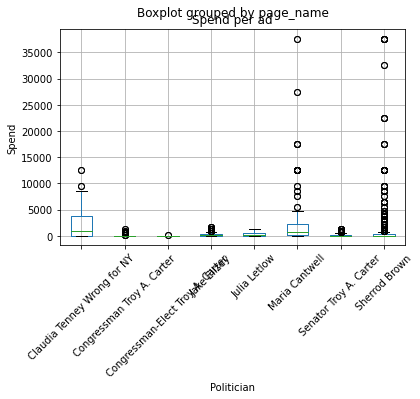

In [4]:
# Boxplot showing outliers of top 10 politicians spending per ads
import matplotlib.pyplot as plt
data.boxplot(by='page_name', column=['spend'], rot=45)
plt.xlabel("Politician")
plt.ylabel('Spend')
plt.title('Spend per ad')

In [20]:
sherrod_brown_grouped_by_day =  sherrod_brown.groupby("ad_creation_time").agg(
            # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', lambda x: x.sum()),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')

        ).reset_index().sort_values(by="ad_creation_time", ascending=True)

In [48]:
sherrod_brown_grouped_by_day

,ad_creation_time,no_ads,sum_spend_lo,sum_spend_hi,median_spend,avg_spend,sum_impressions_lo,sum_impressions_hi,avg_impressions
0,2018-05-20,4,7000,8196,1899.5,7598.0,660000,769996,714998.0
1,2018-05-25,2,400,598,249.5,499.0,70000,79998,74999.0
2,2018-05-27,2,0,198,49.5,99.0,14000,15998,14999.0
3,2018-05-30,2,400,598,249.5,499.0,30000,39998,34999.0
4,2018-05-31,4,800,1196,249.5,998.0,70000,89996,79998.0
...,...,...,...,...,...,...,...,...,...
97,2021-05-11,4,3000,4196,899.5,3598.0,170000,199996,184998.0
98,2021-06-28,8,800,1592,49.5,1196.0,22000,37992,29996.0
99,2021-09-13,54,5000,11146,49.5,8073.0,106000,175946,140973.0
100,2021-09-15,16,600,2184,49.5,1392.0,40000,63984,51992.0


In [6]:
import sys
sys.path.append('../src') 
from political_ads.visualizer import Visualizer

viz = Visualizer()

viz.spend_over_time_cum(sherrod_brown_grouped_by_day, "Sherrod Brown")

NameError: name 'sherrod_brown_grouped_by_day' is not defined

In [11]:
# Get democrats
import pandas as pd

congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info.csv")

democrats = congress[congress["party"] == "Democrat"]


In [1]:
import sys
sys.path.append('../src') 
from political_ads.preprocessor import Preprocessor

preprocess = Preprocessor()
big_data = preprocess.file_to_df("..\\data\\all_politicians_aggregated.txt")

In [3]:
text = " s is a pressing issue Economic climate climate warming , we have to act now!!!"

check = "climate" or ("global" and "warming") (not ("business climate" or "economic climate" or "biz climate"))

def check_for_climate_ad(text: str): # returns true if climate related keyword contained, false otherwise
    # text_lower = list((map(lambda x: x.lower(), text)))
    text_lower = text.lower()
    return ("climate" in text_lower) | (("global" in text_lower) and ("warming" in text_lower)) and (("business climate" not in text_lower) | ("economic climate" not in text_lower)) 

def check_for_NON_climate_ad(text: str): # returns true if climate related keyword contained, false otherwise
    # text_lower = list((map(lambda x: x.lower(), text)))
    text_lower = text.lower()
    return not ("climate" in text_lower) | (("global" in text_lower) and ("warming" in text_lower)) and (("business climate" not in text_lower) | ("economic climate" not in text_lower)) 


In [129]:
from nltk.tokenize import word_tokenize

res = word_tokenize(big_data["ad_creative_body"][0])

x = list(map(lambda x: x.lower(),res))

big_data["climate?"] = big_data["ad_creative_body"].apply(lambda x: "yes" if check_for_climate_ad(str(x)) else "nope")

In [4]:
climate_ads = big_data[big_data.apply(lambda x: check_for_climate_ad(str(x["ad_creative_body"])),axis=1)]
climate_ads

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi
295,2019-11-22,Climate change is hurting our communities and ...,649.5,47499.5,"[{'percentage': '0.000351', 'region': 'Kansas'...","[{'percentage': '0.000336', 'age': '18-24', 'g...",983573491675080,Grace Meng,GRACE FOR NEW YORK,2919477421415464,600,699,45000,49999
296,2019-11-22,Climate change is hurting our communities and ...,149.5,12499.5,"[{'percentage': '0.000354', 'region': 'West Vi...","[{'percentage': '0.001005', 'age': '55-64', 'g...",983573491675080,Grace Meng,GRACE FOR NEW YORK,416312259306104,100,199,10000,14999
300,2019-11-07,Climate change is the most pressing issue of o...,649.5,47499.5,"[{'percentage': '0.000121', 'region': 'North D...","[{'percentage': '0.000119', 'age': '18-24', 'g...",983573491675080,Grace Meng,GRACE FOR NEW YORK,2545037148907191,600,699,45000,49999
308,2019-11-07,Climate change is the most pressing issue of o...,2249.5,162499.5,"[{'percentage': '7.5E-5', 'region': 'Vermont'}...","[{'percentage': '7.4E-5', 'age': '13-17', 'gen...",983573491675080,Grace Meng,GRACE FOR NEW YORK,456602951635291,2000,2499,150000,174999
316,2019-11-06,Climate change is the most pressing issue of o...,49.5,1499.5,"[{'percentage': '0.000907', 'region': 'Arkansa...","[{'percentage': '0.177046', 'age': '25-34', 'g...",983573491675080,Grace Meng,Grace for New York,489202311938505,0,99,1000,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342147,2021-07-30,Wildfires. Deadly heat waves. Extreme weather ...,49.5,499.5,NaN,NaN,47918118982,Karen Bass,Karen Bass for Congress,140798874863581,0,99,0,999
342148,2021-07-30,Wildfires. Deadly heat waves. Extreme weather ...,49.5,499.5,"[{'percentage': '1', 'region': 'California'}]","[{'percentage': '0.033457', 'age': '45-54', 'g...",47918118982,Karen Bass,Karen Bass for Congress,578444616868691,0,99,0,999
342152,2021-07-30,Wildfires. Deadly heat waves. Extreme weather ...,49.5,499.5,NaN,NaN,47918118982,Karen Bass,Karen Bass for Congress,338853091048013,0,99,0,999
342153,2021-07-30,Wildfires. Deadly heat waves. Extreme weather ...,49.5,499.5,"[{'percentage': '1', 'region': 'California'}]","[{'percentage': '0.001401', 'age': '55-64', 'g...",47918118982,Karen Bass,Karen Bass for Congress,566685434463327,0,99,0,999


In [149]:
non_climate_ads = big_data[big_data.apply(lambda x: check_for_NON_climate_ad(str(x["ad_creative_body"])),axis=1)]

In [15]:
climate_ads_by_day = grouper.group_ads_by_day(climate_ads)
climate_ads.head(1)

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi,spend_per_impr_lo
295,2019-11-22,Climate change is hurting our communities and ...,649.5,47499.5,"[{'percentage': '0.000351', 'region': 'Kansas'...","[{'percentage': '0.000336', 'age': '18-24', 'g...",983573491675080,Grace Meng,GRACE FOR NEW YORK,2919477421415464,600,699,45000,49999,75.0


In [27]:
def calc_spend_per_impr(x):
    return x.impressions/x.spend

In [28]:
climate_ads["spend_per_impr"] = climate_ads.apply(lambda x: calc_spend_per_impr(x), axis=1)

C:\Users\laise\AppData\Local\Temp/ipykernel_13052/3911132074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_ads["spend_per_impr"] = climate_ads.apply(lambda x: calc_spend_per_impr(x), axis=1)


In [29]:
climate_ads

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi,spend_per_impr_lo,spend_per_impr_hi,spend_per_impr
295,2019-11-22,Climate change is hurting our communities and ...,649.5,47499.5,"[{'percentage': '0.000351', 'region': 'Kansas'...","[{'percentage': '0.000336', 'age': '18-24', 'g...",983573491675080,Grace Meng,GRACE FOR NEW YORK,2919477421415464,600,699,45000,49999,75.0,71.529328,73.132410
296,2019-11-22,Climate change is hurting our communities and ...,149.5,12499.5,"[{'percentage': '0.000354', 'region': 'West Vi...","[{'percentage': '0.001005', 'age': '55-64', 'g...",983573491675080,Grace Meng,GRACE FOR NEW YORK,416312259306104,100,199,10000,14999,100.0,75.371859,83.608696
300,2019-11-07,Climate change is the most pressing issue of o...,649.5,47499.5,"[{'percentage': '0.000121', 'region': 'North D...","[{'percentage': '0.000119', 'age': '18-24', 'g...",983573491675080,Grace Meng,GRACE FOR NEW YORK,2545037148907191,600,699,45000,49999,75.0,71.529328,73.132410
308,2019-11-07,Climate change is the most pressing issue of o...,2249.5,162499.5,"[{'percentage': '7.5E-5', 'region': 'Vermont'}...","[{'percentage': '7.4E-5', 'age': '13-17', 'gen...",983573491675080,Grace Meng,GRACE FOR NEW YORK,456602951635291,2000,2499,150000,174999,75.0,70.027611,72.238053
316,2019-11-06,Climate change is the most pressing issue of o...,49.5,1499.5,"[{'percentage': '0.000907', 'region': 'Arkansa...","[{'percentage': '0.177046', 'age': '25-34', 'g...",983573491675080,Grace Meng,Grace for New York,489202311938505,0,99,1000,1999,1000.0,1999.000000,30.292929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342147,2021-07-30,Wildfires. Deadly heat waves. Extreme weather ...,49.5,499.5,NaN,NaN,47918118982,Karen Bass,Karen Bass for Congress,140798874863581,0,99,0,999,0.0,999.000000,10.090909
342148,2021-07-30,Wildfires. Deadly heat waves. Extreme weather ...,49.5,499.5,"[{'percentage': '1', 'region': 'California'}]","[{'percentage': '0.033457', 'age': '45-54', 'g...",47918118982,Karen Bass,Karen Bass for Congress,578444616868691,0,99,0,999,0.0,999.000000,10.090909
342152,2021-07-30,Wildfires. Deadly heat waves. Extreme weather ...,49.5,499.5,NaN,NaN,47918118982,Karen Bass,Karen Bass for Congress,338853091048013,0,99,0,999,0.0,999.000000,10.090909
342153,2021-07-30,Wildfires. Deadly heat waves. Extreme weather ...,49.5,499.5,"[{'percentage': '1', 'region': 'California'}]","[{'percentage': '0.001401', 'age': '55-64', 'g...",47918118982,Karen Bass,Karen Bass for Congress,566685434463327,0,99,0,999,0.0,999.000000,10.090909


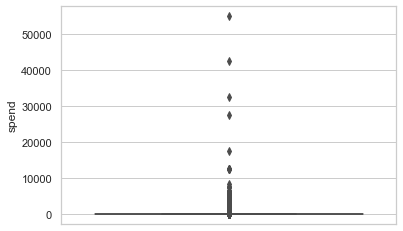

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=climate_ads["spend"])

In [124]:
climate_ads["ad_creative_body"].to_csv("climate_ads_test.csv")

In [128]:
climate_ads["spend"].sum()

1523560.5

In [12]:
big_data_democrats = big_data[big_data.page_id.isin(democrats.page_id)]

In [13]:
big_data_democrats_by_day = grouper.group_ads_by_day(big_data_democrats)

In [25]:
big_data_democrats_by_day

,ad_creation_time,no_ads,sum_spend_lo,sum_spend_hi,median_spend,avg_spend,sum_impressions_lo,sum_impressions_hi,avg_impressions
0,2017-06-26,17,0,1683,49.5,841.5,30000,46983,38491.5
1,2017-07-25,32,200,3368,49.5,1784.0,73000,112968,92984.0
2,2017-08-01,119,2000,13781,49.5,7890.5,247000,417881,332440.5
3,2017-08-15,27,0,2673,49.5,1336.5,0,26973,13486.5
4,2017-08-18,16,0,1584,49.5,792.0,31000,46984,38992.0
...,...,...,...,...,...,...,...,...,...
1147,2021-10-29,172,5900,23328,49.5,14614.0,193000,385828,289414.0
1148,2021-10-30,2,100,298,99.5,199.0,24000,29998,26999.0
1149,2021-10-31,45,0,4455,49.5,2227.5,0,44955,22477.5
1150,2021-11-01,337,0,33363,49.5,16681.5,11000,347663,179331.5


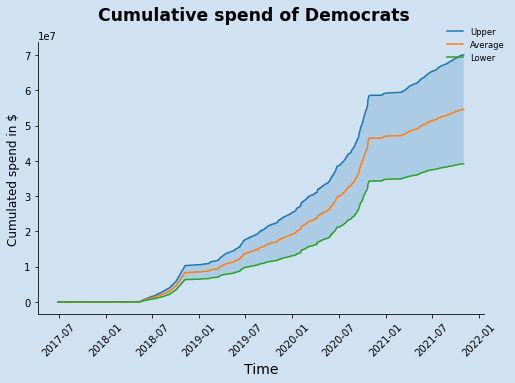

In [27]:
# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# This graph: https://swdevnotes.com/python/2020/display-line-chart-range/
import matplotlib.pyplot as plt
politician = 'Democrats'

# df_c = u5mr_df.loc[([country]), :]
df_c = big_data_democrats_by_day
days = df_c.ad_creation_time
lower = df_c.sum_spend_lo.cumsum()
average = df_c.avg_spend.cumsum()
upper = df_c.sum_spend_hi.cumsum()

title = f'Cumulative spend of {politician}'

fig, ax = plt.subplots(figsize = (8,5), facecolor = plt.cm.Blues(.2))
fig.suptitle(title, fontsize = 'xx-large',  fontweight = 'bold')

ax.set_facecolor(plt.cm.Blues(.2))
ax.plot(days, upper, label = 'Upper')
ax.plot(days, average, label = 'Average')
ax.plot(days, lower, label = 'Lower')
ax.legend(bbox_to_anchor = (0.9, 0.9),
          loc = 'lower left',
          frameon = False,
          fontsize = 'small')
ax.set_ylabel('Cumulated spend in $', fontsize = 'large')
ax.set_xlabel('Time', fontsize=14)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.fill_between(days, lower, upper, alpha=0.2)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [ ]:
no_ads = by_page["no_ads"].sum()
no_sites = len(by_page)
print(f"Dataset contains {no_sites} pages with total of {no_ads} ads.")
ads_per_page = no_ads/no_sites
total_appr = int(538 * ads_per_page)
print(f"Therefore whole dataset contains appr. {total_appr} ads")

In [ ]:
import sys
sys.path.append('../src') 
from political_ads.preprocessor import Preprocessor

preprocess = Preprocessor()

data = preprocess.file_to_df("..\\data\\all_politicians_aggregated.txt")

In [ ]:
data[data["ad_creative_body"].str.contains("Climate change | climate change", na=False)]

In [ ]:
import pandas as pd
congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info.csv")

In [37]:
def check_if_in(x, arr: np.ndarray):
    return x in arr

congress["already_fetched"] = congress["page_id"].apply(lambda x: "done" if check_if_in(x, data["page_id"].values) else "missing")

,first_name,last_name,full_name,type,state,district,party,facebook,page_name,identifier,page_id,in,already_fetched
0,Sherrod,Brown,Sherrod Brown,sen,OH,NaN,Democrat,SenatorSherrodBrown,NaN,0,6266829799,match,done
1,Maria,Cantwell,Maria Cantwell,sen,WA,NaN,Democrat,senatorcantwell,Senator Maria Cantwell,100044609161538,9351652533,no_match,missing
2,Benjamin,Cardin,Benjamin L. Cardin,sen,MD,NaN,Democrat,senatorbencardin,Senator Ben Cardin,100044326544838,no match,no_match,missing
3,Thomas,Carper,Thomas R. Carper,sen,DE,NaN,Democrat,tomcarper,Senator Tom Carper,100044593172202,no match,no_match,missing
4,Robert,Casey,"Robert P. Casey, Jr.",sen,PA,NaN,Democrat,SenatorBobCasey,U.S. Senator Bob Casey,100044143479624,no match,no_match,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Claudia,Tenney,Claudia Tenney,rep,NY,22.0,Republican,NaN,NaN,0,2220944231249057,match,done
534,Julia,Letlow,Julia Letlow,rep,LA,5.0,Republican,NaN,NaN,0,101501768597429,match,done
535,Troy,Carter,Troy A. Carter,rep,LA,2.0,Democrat,NaN,NaN,0,876319055750124,match,done
536,Melanie,Stansbury,Melanie A. Stansbury,rep,NM,1.0,Democrat,NaN,NaN,0,no match,no_match,missing
